## Первичное знакомство с данными

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder, 
                                   StandardScaler)

# отключим некритические предупреждения в коде
import warnings
warnings.filterwarnings("ignore")

# сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы
pd.set_option('display.max_columns', None)

#зададим константу 
RANDOM_STATE = 12345

In [50]:
import pickle
from pickle import load

In [51]:
import pickle
from pickle import load
with open("model1.pcl", "bw") as fid:
    pickle.dump(grid_search, fid)

### Импорт данных

In [2]:
#Функция для импорта данных и просмотра основнйо информации
def load_dataset(path):
    dataset = pd.read_csv(path, index_col=0)
    display(dataset.info())
    display(dataset.sample(5))
    return dataset

#### Основной файл - data

In [3]:
data = load_dataset('data.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325623 entries, 0 to 325622
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   whs                     325623 non-null  int64  
 1   orderkey                325623 non-null  object 
 2   selected_cartontype     325623 non-null  object 
 3   box_num                 325623 non-null  int64  
 4   recommended_cartontype  325623 non-null  object 
 5   selected_carton         325623 non-null  object 
 6   sel_calc_cube           325623 non-null  int64  
 7   recommended_carton      325623 non-null  object 
 8   pack_volume             325623 non-null  int64  
 9   rec_calc_cube           325623 non-null  int64  
 10  goods_wght              325623 non-null  float64
 11  sku                     325623 non-null  object 
 12  who                     325623 non-null  object 
 13  trackingid              325623 non-null  object 
dtypes: float64(1), int64

None

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
154685,0,dca0074a538671c68ff13b89c2f5a974,MYB,1,MYA,MYB,3449,MYA,30,998,0.009,af31f44c5f0a82760723a002e4cbcf72,3c1ce2ca41035e7dae93b81e51fc7409,ad7d82b970ab8b52a5d2e32f8514ecf7
297930,5,7dc37183232cfc86545e15231824c533,NONPACK,1,NONPACK,NONPACK,0,NONPACK,2116,0,0.600,bdfc17903dbe0042047fd3c8210fc726,37c8a14e7089a497d76e4139937ca3e8,4d26c4c6a19bbe55656c3778f6134f9a
67229,0,af8fd6e9e3c0b1119ead1d276e59f8a9,MYC,1,YMC,MYC,8436,YMC,3888,9000,0.644,c33c009a896922c8444c9db4fada9d97,1ca46a6f963766b54a541175e35601b8,6989d635074def36055fcca0b3f44c6a
184870,0,ed3a1cf515c0d39fc99745576db7919a,MYB,1,MYC,MYB,3449,MYC,691,8436,0.252,b935b046d7a07d9c552bf7eff967c741,53c513f5c97b26a3d7eb35efde4ea886,102dceca31c517f61e841537a0e578e7
260964,3,ec97f50c8d2bb3a2b5b9ce81b1eac211,MYC,1,MYC,MYC,8436,MYC,2470,8436,0.800,ddc9c9ee3760aa6796f49298155f91d5,22f056f596b288a359003ea70d91457d,6e4c97551378750f4db618ff3fdfbce7


Информация по заказам и товарам (sku), которые в них содержатся

- whs - код сортировочного центра;
- orderkey - id заказа;
- selected_cartontype - код упаковки, которая была выбрана пользователем;
- box_num - количество коробок;
- recommended_cartontype - код упаковки, рекомендованной алгоритмом;
- selected_carton - код упаковки, которая была выбрана пользователем (дубль);
- sel_calc_cube - объём выбранной упаковки;
- recommended_carton - код упаковки, рекомендованной алгоритмом (дубль);
- pack_volume - рассчитанный объём упакованных товаров;
- rec_calc_cube - объем рекомендуемой упаковки;
- goods_wght - вес товара;
- sku - id товара;
- who - упаковщик;
- trackingid - id доставки;

#### SKU - размеры товаров

In [4]:
sku = load_dataset('sku.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385961 entries, 0 to 6385960
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   sku     object 
 1   a       float64
 2   b       float64
 3   c       float64
dtypes: float64(3), object(1)
memory usage: 243.6+ MB


None

,sku,a,b,c
4480824,2d92c1e210dfb5cf1393675d28bee7d0,30.0,30.0,30.0
2241364,eb8aaf5615a4fa590ca749a1f72da62d,22.0,1.0,31.0
2668714,a9d9fa869707d5fc59a2d65f22fff6dc,18.0,9.0,39.0
2613063,a099d67bfdb4790afa1ab5451ca92e3c,4.0,17.0,4.0
5826435,5d62c4936578b2f5bc3930f362cb652a,15.0,5.0,10.0


Выгрузка id товаров и их размеров.
- sku - id товара
- a, b, c, - размеры

#### sku_cargotypes

In [5]:
sku_cargotypes = load_dataset('sku_cargotypes.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21053152 entries, 0 to 21053151
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   sku        object
 1   cargotype  int64 
dtypes: int64(1), object(1)
memory usage: 481.9+ MB


None

,sku,cargotype
9696667,bd403ea386a3437facaa1ad8009f24e1,950
11140473,12e7a8ce815dafbaa91478f7083cf4c0,520
18205088,be24743b563ef851a12583d00bb35d80,441
16817663,28589c4e31af9d82bea93cd68546ae0f,960
7208800,bb02cef9b68f8fd9d2a541d061072423,290


Выгрузка id товаров и их карготипов.
- sku -  id товара
- cargotype - карготип товара

#### cargotype_info 

In [6]:
cargotype_info = load_dataset('cargotype_info.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cargotype    96 non-null     float64
 1   description  98 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


None

,cargotype,description
68,292.0,Склад КГТ (крупногабаритный товар)
66,290.0,Склад МГТ (малогабаритный товар)
56,330.0,семена
45,799.0,требует доставки с термо режимом 0+
4,990.0,Потребует обязательной маркировки в ближайшем ...


#### carton - размеры упаковок

In [7]:
carton = pd.read_csv('carton.csv')
display(carton.info())
display(carton.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CARTONTYPE     29 non-null     object 
 1   LENGTH         29 non-null     float64
 2   WIDTH          29 non-null     float64
 3   HEIGHT         29 non-null     float64
 4   DISPLAYRFPACK  29 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


None

,CARTONTYPE,LENGTH,WIDTH,HEIGHT,DISPLAYRFPACK
4,YMG,44.7,30.0,20.00,1
17,YMU,27.0,24.0,4.00,1
24,MYA,15.0,20.0,3.33,1
3,YMF,35.0,25.0,15.00,1
1,YMC,30.0,20.0,15.00,1


Таблица с идентификаторами и линейными размерами упаковок.

- CARTONTYPE - идентификатор (код) упаковки;
- LENGTH, WIDTH, HEIGTH - линейные размеры упаковки;
- DISPLAYFRACK - коробка есть на складе (не учитывать для наших целей).

#### carton_price - цена упаковок

In [8]:
carton_price = pd.read_excel('carton_price.xlsx', decimal=',')
carton_price = carton_price.rename(columns = {'Unnamed: 0' : 'cartontype',
                                                '01.03.2023' : 'price'
                                              })
display(carton_price.info())
display(carton_price.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cartontype  15 non-null     object 
 1   price       15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


None

,cartontype,price
9,YMF,10.661487
13,YMX,28.481250
11,YML,37.694566
5,MYF,4.083130
8,YME,23.670260


Таблица с идентификаторами упаковок и их стоимостью.

- cartontype  - идентификатор (код) упаковки
- price - стоимость

### EDA

В описании исходных данных есть информация, что колонки 'recommended_carton' и 'recommended_cartontype', 'selected_carton' и - 'selected_cartontype 'дублируют друг дурга. Удалим лишние.

In [9]:
data = data.drop(['recommended_carton', 'selected_carton'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325623 entries, 0 to 325622
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   whs                     325623 non-null  int64  
 1   orderkey                325623 non-null  object 
 2   selected_cartontype     325623 non-null  object 
 3   box_num                 325623 non-null  int64  
 4   recommended_cartontype  325623 non-null  object 
 5   sel_calc_cube           325623 non-null  int64  
 6   pack_volume             325623 non-null  int64  
 7   rec_calc_cube           325623 non-null  int64  
 8   goods_wght              325623 non-null  float64
 9   sku                     325623 non-null  object 
 10  who                     325623 non-null  object 
 11  trackingid              325623 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 32.3+ MB


Добавим к основным данным размер товара.

In [10]:
full_data = data.merge(sku, on='sku', how='left')
full_data.sample(5)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c
288043,4,cd23e02d8e0df44ac62d5f242fd6d585,MYC,1,YMF,8436,3536,13500,1.000,71951348791efffb95aee88a72540c1a,769a2b6f6ddc0aa9c72b53ba3f064f8b,b8995ac0f4dc312ea985072c281048a9,13.0,34.0,8.0
73663,0,d9d9082aed6cf0a977e7e3a563e0cb04,MYC,1,MYB,8436,360,3449,0.140,7f4b206e32f001a6f29805c69cfc772a,39251adae53bbc12f610a6815ccf180d,f92cb618361bf8e02ecd15392b270b26,5.0,18.0,4.0
289547,4,501f5a3f61529b2268e0f6ef154169d5,YMW,1,YMW,21812,5000,21812,0.921,e139d1a8c0f84f45ac510168393d3b59,2bb54110a62fa9608957fab3f845c2f1,2b256a163a6703a32e076e735d3327ef,26.5,10.6,17.8
263037,3,5538a41779970260ac018efa8d10a605,NONPACK,1,YMG,0,5776,26153,1.500,6db30550e132cc2e385662009fe75391,1eb5ffde0be8bc5dc4fd6dee54243ad7,bd3023df3b4e30af4a8cb9c3cde630e6,19.0,16.0,19.0
208356,1,2f6fd61682708fd6e2b379d7e73d1996,YMC,1,MYC,9000,1140,8436,0.300,644b06a353b98cb07b41d508fd2ec78b,1c97207398ed41d8df6aaf8b7ca99709,ca3461b8fe3d2d4548882568170a5a67,5.0,19.0,12.0


Добавим к основным данным цены упаковок, для этого переименуем заголовки в таблице с ценами.

In [11]:
carton_price_selected = carton_price.rename(columns = {'cartontype' : 'selected_cartontype',
                                                'price' : 'selected_carton_price'
                                              })
carton_price_recommended = carton_price.rename(columns = {'cartontype' : 'recommended_cartontype',
                                                'price' : 'recommended_carton_price'
                                              })

In [12]:
%%time
full_data = full_data.merge(carton_price_selected, on='selected_cartontype', how='left')
full_data = full_data.merge(carton_price_recommended, on='recommended_cartontype', how='left')
full_data.sample(5)

Wall time: 289 ms


,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price
68674,0,5dfdd03c8f1c0fc7442b629b7776a869,MYD,1,YMA,15579,683,3705,0.443,71f6227aaa7a2b89e0c66ae29043ea3d,b217f95328ef08f9daad2d24876ad827,b300ebca027b578a97da644f0af2cbba,6.0,21.1,5.4,6.918375,4.392937
145597,0,f08e3a51fe23d1d85e061b28ef30cf82,YMW,1,YMX,18000,4068,46800,0.095,fcf7418e4e6150df1af888117c5c3ec5,e3c81691fccbb15129ae6ebb0f2203e9,53571d80f9eb569c7c5ebb3f088ad58a,32.2,3.9,32.4,13.870000,28.481250
303598,6,7a8c9735c02dd4519a5a2084da0d9d4b,STRETCH,1,YME,0,16224,43200,0.700,a18794728ab12a1484ac7527a4d294c2,cc13d6620f94635b8f376aa2eb70f119,3e6d3981ec24d667ad0eacba2949ded9,NaN,NaN,NaN,NaN,23.670260
167575,0,a36f3e4ef94513c3b2a517ba177cb3cd,YMC,1,YMA,9000,200,3705,0.030,f9fc339177129806e217f66cd3f9b1b8,e59271ea5f47f8669e8546db0d730575,180fc37f9dceb7ad489ad28130b9838b,5.0,8.0,5.0,7.777487,4.392937
309774,7,9daab4d65200aed453024e4a18823503,YMW,1,YMG,21812,1350,18270,0.090,1e51e101e2a2d4e702555a67718fb266,3885acfc75b62149f3f3c3cafc1e486c,d28b62e28b03db7557acb1151b8d699b,15.0,6.0,15.0,13.870000,17.466367


#### Исследование наполнения заказов

##### Посчитаем сколько товаров в заказе

In [13]:
items_in_order = full_data.groupby('orderkey').size().reset_index(name='count').sort_values(by='count', ascending=False)
items_in_order.head()

,orderkey,count
124435,c6f08cf222f425f397a9f1beaac0e485,4770
106649,aac30fd1be266afae94a86bd5628a875,526
56276,59ff5833bb533928050f23c8b4ed048c,281
991,019902864522eae8aeec192b9e8e1803,100
123522,c5895f8e1675591ecf7cc5b530a02ae0,95


##### Как trackingid соотносится с orderkey

Посчитаем количество уникальных trackingid в заказе.

In [14]:
track_in_order = full_data.groupby('orderkey')['trackingid'].nunique().reset_index().sort_values(by='trackingid', ascending=False)
track_in_order.head()

,orderkey,trackingid
124435,c6f08cf222f425f397a9f1beaac0e485,235
107368,abdeb87383eae3d971b8e325da219120,27
53660,55e679ce9d303e723c327e868da94e50,21
46869,4af74a7352fc8ef085ea81d65951e4e3,21
156977,fb3f2cc235341e29b329635e8329e6e5,21


Посчитаем количество уникальных box_num в заказе.

In [15]:
box_in_order = full_data.groupby('orderkey')['box_num'].nunique().reset_index().sort_values(by='box_num', ascending=False)
box_in_order.head()

,orderkey,box_num
124435,c6f08cf222f425f397a9f1beaac0e485,235
107368,abdeb87383eae3d971b8e325da219120,27
78931,7e5bf787762c5bd900fa3ff98c5d3e14,21
120938,c172cce0bb3f5984f0e2777794082ea9,21
46869,4af74a7352fc8ef085ea81d65951e4e3,21


**Вывод**

trackingid - эт оуникальный идентификатор упаковки. По этому параметры можно выяснить

Посчиатем количество сборщиков одного заказа.

In [16]:
who_in_order = full_data.groupby('orderkey')['who'].nunique().reset_index().sort_values(by='who', ascending=False)
who_in_order.head()

,orderkey,who
158782,fe28d4246a049f10438b075f2aa97e5a,5
124435,c6f08cf222f425f397a9f1beaac0e485,5
78837,7e36bf68e367208f59e67a63e94219d7,5
105827,a981d50aac9251c83f5d5d7fc14ffc32,4
19067,1e989fbc6cc97b390a492840e8e9a651,4


Объединимподсчеты в одну таблицу

In [17]:
in_order = items_in_order.merge(track_in_order, on='orderkey', how='left')
in_order = in_order.merge(box_in_order, on='orderkey', how='left')
in_order = in_order.merge(who_in_order, on='orderkey', how='left')
in_order = in_order.rename(columns = {'count' : 'count_items',
                                                'trackingid' : 'count_tracking'
                                              })
in_order.head()

,orderkey,count_items,count_tracking,box_num,who
0,c6f08cf222f425f397a9f1beaac0e485,4770,235,235,5
1,aac30fd1be266afae94a86bd5628a875,526,11,11,2
2,59ff5833bb533928050f23c8b4ed048c,281,9,9,2
3,019902864522eae8aeec192b9e8e1803,100,1,1,1
4,c5895f8e1675591ecf7cc5b530a02ae0,95,1,1,1


Проверим, есть ли заказы, где количество коробок с уникалным номером и уникальных trackingid не совпадает.

In [18]:
in_order.query('count_tracking!=box_num')

,orderkey,count_items,count_tracking,box_num,who
2697,53eff32e8afa716d5770217e53680282,10,5,3,2
4023,f3e475c16719938dfc49d5a6f271d0e7,8,2,1,2
7300,6bf150758433a688588f46cd55cfb99a,6,2,1,2
7406,a19eb1a59de10e631ead8e3260447976,6,2,1,2
8053,20604560d403df5b6753cb5859fbf775,6,2,1,2
16593,00c4002326c3a48a920813d56cfeca77,4,2,1,2
17936,f4438b14cf40747ae193528b5053330c,4,2,1,2
19180,ceddca4beae8425e09c8bce2cb4500c6,3,3,2,2
31419,8ae62b06ce9438d9dd9399b9625887b8,2,2,1,2
33200,9328579a8f3b4f6074c68fde6f677ccb,2,2,1,2


Есть 15 заказов, у которых количество коробок не совпадает с количеством доставок (trackingid). У всех таких заказов несколько сборщиков. Пример:

In [19]:
full_data.query('orderkey=="53eff32e8afa716d5770217e53680282"').sort_values(by='who', ascending=False).head(10)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price
179700,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,3720,18000,2.067,dcd4ed253127cef27ab7fa1322317388,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,9.0,32.3,12.8,6.918375,13.870000
179751,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,715,18000,0.020,0b8bfbd7ee374de0fb8a16d8468706c8,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,5.5,9.1,14.3,6.918375,13.870000
179833,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,461,18000,0.034,1fa982847f363aec1ca28ad62ebcf02f,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,5.5,7.7,10.9,6.918375,13.870000
180058,0,53eff32e8afa716d5770217e53680282,MYD,1,YMW,15579,44,18000,0.005,f2392baa3f7af60fdd2c77d7bb4af026,da9c87a658c95056b27e62bd4dfda5a2,9ff5ba1fb8ea0235684bf034070d114d,11.0,2.0,2.0,6.918375,13.870000
181760,0,53eff32e8afa716d5770217e53680282,MYD,2,YMC,15579,6914,9000,5.145,f34c065e1f023dba120980d0933a4e46,da9c87a658c95056b27e62bd4dfda5a2,50ad5c5598c6b2a7d0b3ee00071333bf,12.5,29.9,18.5,6.918375,7.777487
162622,0,53eff32e8afa716d5770217e53680282,MYC,2,YMF,8436,3720,13125,2.067,dcd4ed253127cef27ab7fa1322317388,a0a143e6c7868c4e47c71b81adbf93f5,c1d99024eca5e99363f0dd14694772d3,9.0,32.3,12.8,3.616713,10.661487
162644,0,53eff32e8afa716d5770217e53680282,MYA,3,YMA,998,715,3705,0.020,0b8bfbd7ee374de0fb8a16d8468706c8,a0a143e6c7868c4e47c71b81adbf93f5,76106a0a3418e83f8c2e8e2555ff1b7a,5.5,9.1,14.3,1.109861,4.392937
162707,0,53eff32e8afa716d5770217e53680282,MYA,3,YMA,998,461,3705,0.034,1fa982847f363aec1ca28ad62ebcf02f,a0a143e6c7868c4e47c71b81adbf93f5,76106a0a3418e83f8c2e8e2555ff1b7a,5.5,7.7,10.9,1.109861,4.392937
162893,0,53eff32e8afa716d5770217e53680282,MYA,3,YMA,998,44,3705,0.005,f2392baa3f7af60fdd2c77d7bb4af026,a0a143e6c7868c4e47c71b81adbf93f5,76106a0a3418e83f8c2e8e2555ff1b7a,11.0,2.0,2.0,1.109861,4.392937
164675,0,53eff32e8afa716d5770217e53680282,NONPACK,1,YMF,0,6914,13125,5.145,f34c065e1f023dba120980d0933a4e46,a0a143e6c7868c4e47c71b81adbf93f5,0ebd10898e05507342da6adc4871345e,12.5,29.9,18.5,NaN,10.661487


In [20]:
full_data.query('orderkey=="f3e475c16719938dfc49d5a6f271d0e7"').sort_values(by='who', ascending=False).head(10)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price
269770,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,11.0,16.0,7.0,1.109861,3.616713
269771,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,11.0,16.0,7.0,1.109861,3.616713
269874,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,13.8,5.6,15.5,1.109861,3.616713
269875,4,f3e475c16719938dfc49d5a6f271d0e7,MYA,1,MYC,999,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,a46ac6485f1225483fdc81ed3c42552f,e673dd013b4805c6602a96de9dae6c7a,13.8,5.6,15.5,1.109861,3.616713
292478,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,11.0,16.0,7.0,8.062722,3.616713
292479,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1232,8436,0.210,9555f159b648eb9dc5fdc146d7feabf5,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,11.0,16.0,7.0,8.062722,3.616713
292597,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,13.8,5.6,15.5,8.062722,3.616713
292598,4,f3e475c16719938dfc49d5a6f271d0e7,MYE,1,MYC,26277,1197,8436,0.206,976d49809485da9a11ed5f02fe458fbd,38d47720746e5a2ed2b077d0e2f3721f,669d03de4ef3cb91297445399155faeb,13.8,5.6,15.5,8.062722,3.616713


**Вывод**
1. Чтобы определить на сколько упаковок был разделен заказ, лучше ориентироваться на trackingid, а не на box_num в одном заказе.
2. Еcть заказы, которые разбиты на несколько коробок не из-за вместимости коробок, а из-за разных сборщиков. Для нашей задачи эти кейсы не интеерсны. Удалим эти строки. 

In [21]:
#удаление заказов с несколькими упаковщиками
diff_who = in_order.query('count_tracking!=box_num')['orderkey']
full_data = full_data.query('orderkey not in @diff_who')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325562 entries, 0 to 325622
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       325562 non-null  int64  
 1   orderkey                  325562 non-null  object 
 2   selected_cartontype       325562 non-null  object 
 3   box_num                   325562 non-null  int64  
 4   recommended_cartontype    325562 non-null  object 
 5   sel_calc_cube             325562 non-null  int64  
 6   pack_volume               325562 non-null  int64  
 7   rec_calc_cube             325562 non-null  int64  
 8   goods_wght                325562 non-null  float64
 9   sku                       325562 non-null  object 
 10  who                       325562 non-null  object 
 11  trackingid                325562 non-null  object 
 12  a                         314769 non-null  float64
 13  b                         314769 non-null  f

Добавим к основнуому датасету информацию о количестве товаров в заказе и количестве упаковок.

In [22]:
in_order = in_order.drop(['box_num','who'], axis=1)
full_data= full_data.merge(in_order, on='orderkey', how='left')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325562 entries, 0 to 325561
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       325562 non-null  int64  
 1   orderkey                  325562 non-null  object 
 2   selected_cartontype       325562 non-null  object 
 3   box_num                   325562 non-null  int64  
 4   recommended_cartontype    325562 non-null  object 
 5   sel_calc_cube             325562 non-null  int64  
 6   pack_volume               325562 non-null  int64  
 7   rec_calc_cube             325562 non-null  int64  
 8   goods_wght                325562 non-null  float64
 9   sku                       325562 non-null  object 
 10  who                       325562 non-null  object 
 11  trackingid                325562 non-null  object 
 12  a                         314769 non-null  float64
 13  b                         314769 non-null  f

<AxesSubplot:>

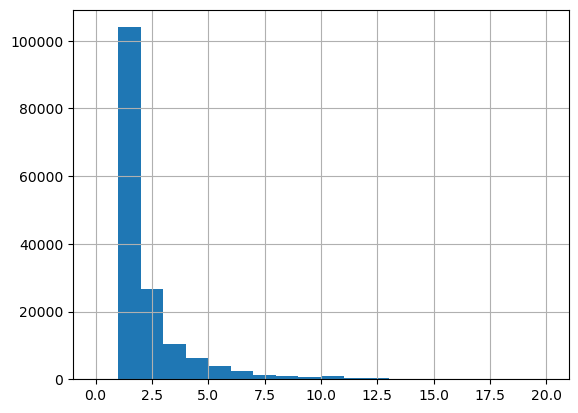

In [23]:
in_order['count_items'].hist(range=(0, 20), bins = 20)

In [24]:
in_order.describe()

,count_items,count_tracking
count,159899.000000,159899.000000
mean,2.036429,1.066780
std,12.306166,0.742652
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,4770.000000,235.000000


<AxesSubplot:xlabel='count_items'>

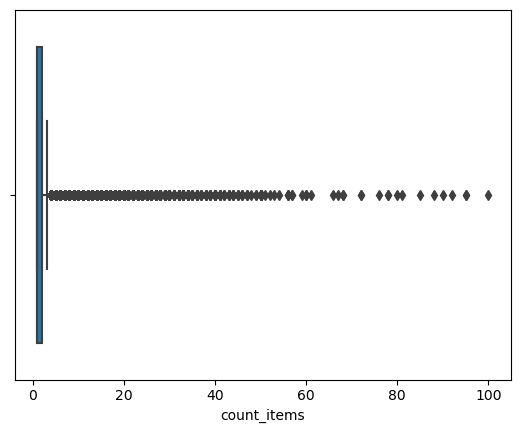

In [25]:
#боксплот без трех самых крпных заказов
sns.boxplot(in_order.query('orderkey not in ["c6f08cf222f425f397a9f1beaac0e485", \
                "aac30fd1be266afae94a86bd5628a875", "59ff5833bb533928050f23c8b4ed048c"]')['count_items'])

In [26]:
in_order.query('count_items < 10')['orderkey'].count()/in_order['orderkey'].count()

0.9799248275473893

**Вывод**
Основная часть заказов с небольших количеством товаров 98% закзаов имеет меньще 10 товаров. Уберем из датасета заказы с большим количеством товаров.

In [27]:
full_data = full_data.query('count_items < 10')
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
whs,270655.0,1.396180,2.101179,0.000000,0.000000,0.000000,3.000000,7.000000e+00
box_num,270655.0,1.085718,0.484850,1.000000,1.000000,1.000000,1.000000,2.000000e+01
sel_calc_cube,270655.0,8725.799265,9020.010085,0.000000,3449.000000,8436.000000,13125.000000,1.080000e+05
pack_volume,270655.0,6074.151592,31200.042215,0.000000,500.000000,1215.000000,3375.000000,1.815450e+06
rec_calc_cube,270655.0,12475.599113,18274.686267,0.000000,3360.000000,8436.000000,13500.000000,1.080000e+05
goods_wght,270655.0,1.242601,4.368032,0.000000,0.119000,0.300000,0.830000,1.537000e+02
a,260422.0,18.489029,16.678407,0.000000,9.000000,14.000000,22.100000,2.570000e+02
b,260422.0,11.587981,10.166444,0.000000,4.700000,9.000000,16.400000,2.400000e+02
c,260422.0,14.710047,10.952327,0.000000,7.000000,11.700000,19.000000,2.000000e+02
selected_carton_price,235866.0,6.152611,5.048246,1.109861,2.297432,3.616713,7.777487,3.769457e+01


#### Исследуем  карготипы

Из списка карготипов выбрали для создания признаков:
1. 'возрастное ограничение на получение товара' - 20
2. 'интим товар' - 910
3. 'керамика/стекло/камень/фарфор' - 315
4. 'не требует упаковки' - 340
5. 'хрупкое' - 310
6. 'упаковка в пленку' - 360
7. 'цифровой товар' - 210
8. 'многоместный товар' - 303

In [28]:
necessary_cargotypes = [20, 910, 315, 340, 310, 360, 210, 303]

In [29]:
# Создадим спсок из sku с нужными каргтипами (из всех возможныз скю)
filtred_sku_cargotypes = sku_cargotypes.query('cargotype in @necessary_cargotypes')
unique_data_fom_data = full_data['sku'].unique()
# Создадим спсок из sku с нужными каргтипами (только те, которые есть в датасете)
filtred_sku_cargotypes = filtred_sku_cargotypes.query('sku in @unique_data_fom_data')
filtred_sku_cargotypes['cargotype2'] = filtred_sku_cargotypes['cargotype']
df_pivot = filtred_sku_cargotypes.pivot_table(index='sku', \
                                              columns='cargotype', \
                                              values='cargotype2', \
                                              aggfunc = 'count').add_prefix('cargotype_')
full_data = full_data.merge(df_pivot, on='sku', how='left')
full_data.sample(5)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price,count_items,count_tracking,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910
192044,2,3786b7c2972d53715d55dc4a38efd13a,STRETCH,1,NONPACK,0,12600,0,0.800,fe2b7f4f9004f50d32ede5b3f202a78f,99fc1811e8e45ed8bd8a8f1d892daa4f,aa13ea02d03dc0b99032a26f8650f07a,72.0,5.0,35.0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1699,0,559b507acba5196291d92fc50f7c33be,YMG,1,YME,26820,12558,40050,1.390,1cf366891d4e82698b946d0df4707990,1ca46a6f963766b54a541175e35601b8,5ca793a4a8583d668d06a11878e1be66,39.0,23.0,14.0,17.466367,23.670260,2,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
254848,6,20423e056b3e0bd8622678b2b6fe0694,YMC,1,YMF,8525,3740,13500,1.684,d6d2d73b6957e6216f95d1c227f953e3,75fbeb9bd9a48834e12b79957159de2b,acca5e5ce904bd29eeb62af471a6c96a,34.0,10.0,11.0,7.777487,10.661487,1,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
148776,0,804a222314ddade4ad357b198749f6b8,YMC,1,MYC,9000,1486,8436,0.049,b60a60b4028eedca635c62c67d4d264e,d17a4c5245002892537053fbc8a99f5a,3bc1fe131c7e6d714933f4fdba5c92df,11.8,18.0,7.0,7.777487,3.616713,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177458,1,461b7b354cfa89cbc63b51467e20e8ea,STRETCH,2,YML,0,14615,104586,5.417,4a86fb1e909af966fe3a119b3a3d2b13,0c9840143a5e05b6aa7106cb8abe4e25,5525e44b4503dbc4d714872547583206,35.6,11.5,35.7,NaN,37.694566,2,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [30]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270655 entries, 0 to 270654
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       270655 non-null  int64  
 1   orderkey                  270655 non-null  object 
 2   selected_cartontype       270655 non-null  object 
 3   box_num                   270655 non-null  int64  
 4   recommended_cartontype    270655 non-null  object 
 5   sel_calc_cube             270655 non-null  int64  
 6   pack_volume               270655 non-null  int64  
 7   rec_calc_cube             270655 non-null  int64  
 8   goods_wght                270655 non-null  float64
 9   sku                       270655 non-null  object 
 10  who                       270655 non-null  object 
 11  trackingid                270655 non-null  object 
 12  a                         260422 non-null  float64
 13  b                         260422 non-null  f

Заполним пропуски в карготипах, в ценах и размерах нулями.

In [31]:
for column in ['cargotype_20', 'cargotype_210', 'cargotype_303', 'cargotype_310',
       'cargotype_315', 'cargotype_340', 'cargotype_360', 'cargotype_910', 
               'a', 'b', 'c', 'selected_carton_price', 'recommended_carton_price' ]:
    full_data[column] = full_data[column].fillna(0)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270655 entries, 0 to 270654
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   whs                       270655 non-null  int64  
 1   orderkey                  270655 non-null  object 
 2   selected_cartontype       270655 non-null  object 
 3   box_num                   270655 non-null  int64  
 4   recommended_cartontype    270655 non-null  object 
 5   sel_calc_cube             270655 non-null  int64  
 6   pack_volume               270655 non-null  int64  
 7   rec_calc_cube             270655 non-null  int64  
 8   goods_wght                270655 non-null  float64
 9   sku                       270655 non-null  object 
 10  who                       270655 non-null  object 
 11  trackingid                270655 non-null  object 
 12  a                         270655 non-null  float64
 13  b                         270655 non-null  f

### Добавим таргет

В качестве таргета берем наименьшею по цене упаковку из рекомендуемой и выбранной.

In [32]:
# Если выбранный и предложенный типы упаковки совпадают, берем их значение
# Если нет, то самую дешевую
def target(data):
    def price(row):
        if row['selected_cartontype'] == row['recommended_cartontype']:
            val = row['selected_cartontype']
        elif row['recommended_carton_price'] < row['selected_carton_price']:
            val = row['recommended_cartontype']
        elif row['selected_carton_price'] < row['recommended_carton_price']:
            val = row['selected_cartontype']
        else:
            val = 'no_price'
        return val
# Если какой-то цены нет, то берем наименьшую
    def size(row):
        if row['rec_calc_cube'] < row['sel_calc_cube']:
            val = row['recommended_cartontype']
        elif row['sel_calc_cube'] < row['rec_calc_cube']:
            val = row['selected_cartontype']
        else :
            val = 'error'
        return val

    data['target'] = data.apply(price, axis=1)
    data.loc[data['target'] == 'no_price', 'target'] = data.apply(size, axis=1)
    return data

In [33]:
full_data = target(full_data)

In [34]:
full_data.sample(5)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c,selected_carton_price,recommended_carton_price,count_items,count_tracking,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910,target
6755,0,0411afc59db2848239ebd03ff3860c75,YMA,1,YMA,3705,1260,3705,0.420,14e05084f62af9dc8f8446dea0ad967f,b217f95328ef08f9daad2d24876ad827,9b0ccab8fa97bc1129a4d3a5ca6ff0fc,15.0,6.0,14.0,4.392937,4.392937,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YMA
166077,0,191bdbb1e9dbd98f5c8c64232884916e,YMG,1,YMF,26820,576,13125,0.140,5e0d550a47db5cdc2d36a13be847a56d,e70cfbdd2f911bc9365be013d74f15ff,35622ee834d40851cb75b2fabf5b81b4,18.0,4.0,8.0,17.466367,10.661487,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YMF
142806,0,4bd8bbfc858b3867328172cbcd93dc47,MYE,1,MYE,26277,4792,26277,1.226,93016900ce30abf65152dc521aee2b4f,176298efc22d8e52eec6a923bf824997,b4b33fd717b8c4f377c0bb27645a3b60,24.7,8.7,22.3,8.062722,8.062722,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,MYE
262480,7,c51816ee3a7f053ea134953bd49e2095,MYD,1,YMC,7600,520,8525,0.127,9edbe0a6869d5e48d6b728517bb0e676,47ae56bdece955fe603e0a13549b6161,97637418344c2c7d4871a05cc0d41a1a,26.0,1.0,20.0,6.918375,7.777487,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYD
185715,2,caf55b4218e12888d9233495445c953f,MYA,1,YMA,999,708,3360,0.447,9ed3e58538f013e9869c030457de1101,905b4fe969b6219bba46e578fa688d58,b1d1059de39fbe20fd9ee8da1e9bf42f,8.4,6.2,13.6,1.109861,4.392937,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYA


Для заказов с одним товаром и карготипом 'не требует упаковки' - 340, заменим таргет на NONPACK.

In [35]:
full_data.loc[(full_data['count_items'] == 1) & (full_data['cargotype_340'] == 1.0), 'target'] = 'NONPACK'

In [36]:
full_data.query('count_items == 1 & cargotype_340 == 1')['target'].unique()

array(['NONPACK'], dtype=object)

In [37]:
orders_one_item = full_data.query('count_items == 1')
orders_one_item.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
whs,103970.0,NaN,NaN,NaN,1.456478,2.050942,0.0,0.0,0.0,3.0,7.0
orderkey,103970,103970,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selected_cartontype,103970,16,MYB,32212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
box_num,103970.0,NaN,NaN,NaN,1.011744,0.159067,1.0,1.0,1.0,1.0,20.0
recommended_cartontype,103970,22,YMA,21829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sel_calc_cube,103970.0,NaN,NaN,NaN,5142.867539,5719.311446,0.0,998.0,3449.0,8436.0,104586.0
pack_volume,103970.0,NaN,NaN,NaN,10794.260912,47427.772426,0.0,513.0,1575.0,5808.0,1815450.0
rec_calc_cube,103970.0,NaN,NaN,NaN,8696.92997,15142.5603,0.0,1447.0,3705.0,9000.0,108000.0
goods_wght,103970.0,NaN,NaN,NaN,1.846998,5.431474,0.0,0.13,0.378,1.063,153.7
sku,103970,53316,bd96ee8a131321f5c6d99aba4d778eed,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
orders_many_items = full_data.query('count_items > 1')
orders_many_items.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
whs,166685.0,NaN,NaN,NaN,1.358569,2.131057,0.0,0.0,0.0,3.0,7.0
orderkey,166685,52705,922bb8015ced3dc0cda8ea9c5be4d696,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selected_cartontype,166685,17,MYC,26795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
box_num,166685.0,NaN,NaN,NaN,1.131859,0.600323,1.0,1.0,1.0,1.0,19.0
recommended_cartontype,166685,22,YMA,26310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sel_calc_cube,166685.0,NaN,NaN,NaN,10960.6579,9935.013069,0.0,3449.0,8525.0,15579.0,108000.0
pack_volume,166685.0,NaN,NaN,NaN,3129.976855,12450.302974,0.0,487.0,1089.0,2630.0,804960.0
rec_calc_cube,166685.0,NaN,NaN,NaN,14832.549234,19616.082501,0.0,3705.0,8525.0,18000.0,108000.0
goods_wght,166685.0,NaN,NaN,NaN,0.865608,3.494227,0.0,0.11,0.284,0.65,135.0
sku,166685,46824,d1c5c59bf0fbf36adacf3ccfd06cc2d5,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Удаление лишних столбцов

In [40]:
orders_one_item = orders_one_item.drop(['recommended_cartontype', 'sku', 'who', 'whs', 'trackingid', 
                                        'count_items', 'recommended_carton_price' , 'rec_calc_cube',
                                        'box_num', 'count_tracking', 'selected_carton_price', 'selected_cartontype',
                                        'sel_calc_cube', 'orderkey'], axis=1)
for column in ['cargotype_20', 'cargotype_210', 'cargotype_303', 'cargotype_310',
       'cargotype_315', 'cargotype_340', 'cargotype_360', 'cargotype_910' ]:
    full_data[column] = full_data[column].astype('int')

orders_one_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103970 entries, 0 to 270654
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   pack_volume    103970 non-null  int64  
 1   goods_wght     103970 non-null  float64
 2   a              103970 non-null  float64
 3   b              103970 non-null  float64
 4   c              103970 non-null  float64
 5   cargotype_20   103970 non-null  float64
 6   cargotype_210  103970 non-null  float64
 7   cargotype_303  103970 non-null  float64
 8   cargotype_310  103970 non-null  float64
 9   cargotype_315  103970 non-null  float64
 10  cargotype_340  103970 non-null  float64
 11  cargotype_360  103970 non-null  float64
 12  cargotype_910  103970 non-null  float64
 13  target         103970 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 11.9+ MB


In [55]:
orders_one_item.head()

,pack_volume,goods_wght,a,b,c,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910,target
0,3050,0.896,18.6,3.3,49.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,STRETCH
1,13662,4.400,30.0,23.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NONPACK
2,4518,0.700,14.0,10.7,43.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NONPACK
3,6346,2.078,23.4,8.0,33.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,STRETCH
4,21150,6.020,30.0,47.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NONPACK


### Обучение модели для товаров с одним заказом

In [41]:
features = orders_one_item.drop('target', axis = 1)
target = orders_one_item['target']

In [42]:
# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Применение Label Encoding к целевому столбцу
target = label_encoder.fit_transform(target)

In [43]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

In [54]:
%%time
scaler = StandardScaler()

catboost = CatBoostClassifier(verbose = False, 
                          random_state = 12345)

parameters = {
    'catboost__iterations': [100, 200, 300],
    'catboost__learning_rate': [0.1, 0.2],
    'catboost__depth': [5, 6, 7, 8]
}
pipeline = Pipeline([
    ('scaler', scaler),
    ('catboost', catboost)
])
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(features_train, target_train)

Wall time: 1h 36s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x000001AA0BAD77F0>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [5, 6, 7, 8],
                         'catboost__iterations': [100, 200, 300],
                         'catboost__learning_rate': [0.1, 0.2]},
             scoring='accuracy')

In [45]:
print('Наилучшие параметры:', grid_search.best_params_)
print('Наилучшее значение', grid_search.best_score_)

Наилучшие параметры: {'catboost__depth': 8, 'catboost__iterations': 200, 'catboost__learning_rate': 0.2}
Наилучшее значение 0.7612171813630317


In [47]:
predictions_encoded = grid_search.predict(features_test)

In [48]:
# Декодирование предсказанных меток
predictions = label_encoder.inverse_transform(predictions_encoded)

### Оценка модели

In [110]:
def price_m(target, predict):
  target_decoded = label_encoder.inverse_transform(target)
  target_df = pd.DataFrame(target_decoded, columns=['Target Label'])
  predictions_decoded = label_encoder.inverse_transform(predict)
  predictions_df = pd.DataFrame(predictions_decoded, columns=['Predicted Label'])

  test = pd.concat([predictions_df, target_df], axis=1)
  test = test.merge(carton_price.rename(columns={'cartontype': 'Predicted Label'}), on = 'Predicted Label', how='left').rename(columns={'price':'pred_price'})
  test = test.merge(carton_price.rename(columns={'cartontype': 'Target Label'}), on = 'Target Label', how='left').rename(columns={'price':'targ_price'})
  test = test.dropna()

  def price_m(row):
      if row['pred_price'] > row['targ_price']:
          val = 1
      else :
          val = 0
      return val

  test['mark'] = test.apply(price_m, axis=1)
  print('В', round(test['mark'].sum() / test['mark'].shape[0] * 100, 2), '% случаев модель предложила упаковку дороже таргета')

price_m(target_test, predictions_encoded)

В 61.87 % случаев модель предложила упаковку дороже таргета


### Вывод

Модель подходит для предсказания коробки по бизнес-метрикам, т.к. % случаев модель предложила упаковку дороже таргета

### Две последовательные модели для заказов снесоклькими товарами

### Модель 1

In [82]:
orders_many_items = orders_many_items.drop(['recommended_cartontype', 'sku', 'who', 'whs', 'trackingid', 
                                         'recommended_carton_price' , 'rec_calc_cube',
                                        'box_num', 'selected_carton_price', 'selected_cartontype',
                                        'sel_calc_cube', 'orderkey'], axis=1)
for column in ['cargotype_20', 'cargotype_210', 'cargotype_303', 'cargotype_310',
       'cargotype_315', 'cargotype_340', 'cargotype_360', 'cargotype_910' ]:
    full_data[column] = full_data[column].astype('int')

orders_many_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166685 entries, 16 to 270651
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pack_volume     166685 non-null  int64  
 1   goods_wght      166685 non-null  float64
 2   a               166685 non-null  float64
 3   b               166685 non-null  float64
 4   c               166685 non-null  float64
 5   count_items     166685 non-null  int64  
 6   count_tracking  166685 non-null  int64  
 7   cargotype_20    166685 non-null  int32  
 8   cargotype_210   166685 non-null  int32  
 9   cargotype_303   166685 non-null  int32  
 10  cargotype_310   166685 non-null  int32  
 11  cargotype_315   166685 non-null  int32  
 12  cargotype_340   166685 non-null  int32  
 13  cargotype_360   166685 non-null  int32  
 14  cargotype_910   166685 non-null  int32  
 15  target          166685 non-null  object 
dtypes: float64(4), int32(8), int64(3), object(1)
memory usa

In [85]:
features_1 = orders_many_items.drop('count_tracking', axis = 1)
features_1 = features_1.drop('target', axis = 1)
target_1 = orders_many_items['count_tracking']

In [89]:
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(
     features_1, target_1, test_size=0.2, random_state=12345)

,pack_volume,goods_wght,a,b,c,count_items,cargotype_20,cargotype_210,cargotype_303,cargotype_310,cargotype_315,cargotype_340,cargotype_360,cargotype_910
16,930,0.723,7.9,15.5,7.6,7,0,0,0,0,0,1,0,0
17,930,0.723,7.9,15.5,7.6,7,0,0,0,0,0,1,0,0
18,930,0.723,7.9,15.5,7.6,7,0,0,0,0,0,1,0,0
19,930,0.723,7.9,15.5,7.6,7,0,0,0,0,0,1,0,0
20,930,0.723,7.9,15.5,7.6,7,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270647,16200,1.700,45.0,8.0,45.0,2,0,0,0,1,0,1,0,0
270648,25168,1.260,44.0,13.0,44.0,2,0,0,0,0,0,1,0,0
270649,25168,1.260,44.0,13.0,44.0,2,0,0,0,0,0,1,0,0
270650,2080,0.100,26.0,20.0,4.0,2,0,0,0,0,0,1,0,0


In [88]:
%%time
scaler = StandardScaler()

catboost = CatBoostClassifier(verbose = False, 
                          random_state = 12345)

parameters_1 = {
    'catboost__iterations': [100, 200],
    'catboost__learning_rate': [0.5],
    'catboost__depth': [6, 8]
}
# Создание pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('catboost', catboost)
])
grid_search_1 = GridSearchCV(pipeline, parameters_1, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_1.fit(features_1, target_1)

Wall time: 5min 16s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x000001AA0BAC3250>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [6, 8],
                         'catboost__iterations': [100, 200],
                         'catboost__learning_rate': [0.5]},
             scoring='accuracy')

In [79]:
print('Наилучшие параметры:', grid_search_1.best_params_)
print('Наилучшее значение', grid_search_1.best_score_)

Наилучшие параметры: {'catboost__depth': 6, 'catboost__iterations': 100, 'catboost__learning_rate': 0.5}
Наилучшее значение 1.0


### Модель 2

In [90]:
box_num_1 = grid_search_1.predict(features_1)

In [91]:
X_train_box_type = np.column_stack((features_1, box_num_1))

In [92]:
features_2 = X_train_box_type

In [93]:
target_2 = orders_many_items['target']

In [94]:
target_2.head(20)

16        MYE
17        MYE
18        MYE
19        MYE
20        MYE
21        MYE
25    NONPACK
26    NONPACK
35      error
39    NONPACK
40    NONPACK
41    NONPACK
43      error
44      error
45      error
46      error
47      error
53    NONPACK
54    NONPACK
57        MYE
Name: target, dtype: object

In [95]:
# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Применение Label Encoding к целевому столбцу
target_2 = label_encoder.fit_transform(target_2)

In [96]:
 features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
     features_2, target_2, test_size=0.05, random_state=12345)

In [97]:
scaler = StandardScaler()

catboost = CatBoostClassifier(verbose = False, 
                          random_state = 12345)

parameters_2 = {
    'catboost__iterations': [100, 200],
    'catboost__learning_rate': [0.5],
    'catboost__depth': [6, 8]
}

In [98]:
grid_search_2 = GridSearchCV(pipeline, parameters_2, cv=5, scoring='accuracy', n_jobs=-1)

In [99]:
%%time
grid_search_2.fit(features_2, target_2)

Wall time: 18min 19s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x000001AA0BAC3250>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [6, 8],
                         'catboost__iterations': [100, 200],
                         'catboost__learning_rate': [0.5]},
             scoring='accuracy')

In [100]:
print('Наилучшие параметры:', grid_search_2.best_params_)
print('Наилучшее значение', grid_search_2.best_score_)

Наилучшие параметры: {'catboost__depth': 6, 'catboost__iterations': 100, 'catboost__learning_rate': 0.5}
Наилучшее значение 0.39628040915499296


In [101]:
predictions_encoded = grid_search_2.predict(features_2)

In [102]:
# Декодирование предсказанных меток
predictions_decoded = label_encoder.inverse_transform(predictions_encoded)

# Преобразование в DataFrame
predictions_df = pd.DataFrame(predictions_decoded, columns=['Predicted Label'])

# Вывод первых нескольких строк
predictions_df.head(25)

,Predicted Label
0,YMF
1,YMF
2,YMF
3,YMF
4,YMF
5,YMF
6,NONPACK
7,NONPACK
8,error
9,YMF
